# Black Image Cause I can't get the EE FootPrint

In [1]:
from datetime import datetime
date_range = (
        datetime(2013,4,10),
        datetime(2013,4,11))

In [2]:
import datacube
dc= datacube.Datacube()

# from bounding box
# https://boundingbox.klokantech.com/
extent = (30.209661,-2.218817,30.246396,-2.163926)

x = (extent[0],extent[2])
y = (extent[1],extent[3])

print (x,y)

aoix = x
aoiy = y

(30.209661, 30.246396) (-2.218817, -2.163926)


In [3]:
product = 'l8_rwanda'
ds = dc.load(product=product,x = x, y = y,
             output_crs = 'epsg:32636', resolution = (-30,30), 
             time = date_range, measurements = ('red', 'green', 'blue','nir') )

TONY product= l8_rwanda


In [4]:
ds

<xarray.Dataset>
Dimensions:  (time: 1, x: 137, y: 204)
Coordinates:
  * time     (time) datetime64[ns] 2013-04-10T08:07:38.966632
  * y        (y) float64 -2.394e+05 -2.395e+05 ... -2.455e+05 -2.455e+05
  * x        (x) float64 1.896e+05 1.896e+05 1.897e+05 ... 1.937e+05 1.937e+05
Data variables:
    red      (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    green    (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    blue     (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    nir      (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
Attributes:
    crs:      epsg:32636

## Its all Black 

### Isn't it?

/usr/local/lib/python3.5/dist-packages/skimage/exposure/exposure.py:129: RuntimeWarning: invalid value encountered in true_divide
  img_cdf = img_cdf / float(img_cdf[-1])


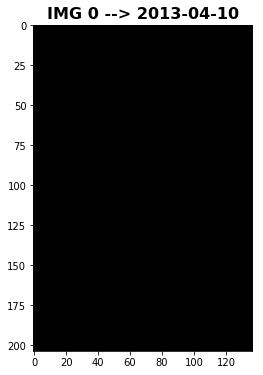

In [5]:
from noteLib import *
%matplotlib inline
for t in range(0,len(ds.time)):
    cnt=t
    figsize=[6,6]
    plot_labeled_rgb(ds, t, cnt, figsize=figsize)

In [6]:
def return_path_row(file_path):
    a = file_path.split('_')
    print(a[2], a[3])
    return(a[2])

In [7]:
dsets = dc.find_datasets(product=product,x = x, y = y,
             output_crs = 'epsg:32636', resolution = (-30,30), 
             time = date_range, measurements = ('red', 'green', 'blue','nir') )

In [8]:
dsets

[Dataset <id=e199fdc9-f750-4feb-b7e5-c6c005ddce02 type=l8_rwanda location=None>]

In [9]:
myds = dsets[0]

print(type(myds))

print(len(dsets))
print ("Number of Datasets")
print(myds.crs)
for uri in myds.uris:
    print(uri)
print(myds.extent)

<class 'datacube.model.Dataset'>
1
Number of Datasets
epsg:32636
/mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1.xml:
Geometry({'coordinates': [[(187200.0, -429600.0), (187200.0, -210900.0), (411600.0, -210900.0), (411600.0, -429600.0), (187200.0, -429600.0)]], 'type': 'Polygon'}, CRS('epsg:32636'))


In [10]:
print (myds.measurements['red']['path'])

fp = myds.measurements['red']['path']

return_path_row(fp)

/mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1_sr_band4.tif
172062 20130410


'172062'

# Display Image Extent from Dataset Postgres

### PINK

In [11]:
print(myds.bounds)

ulX = myds.bounds.left
ulY = myds.bounds.top

lrX = myds.bounds.right
lrY = myds.bounds.bottom

print(myds.crs)
ep = myds.crs
m = prj_base_map(ulX,ulY,lrX,lrY,resolution=None, epsg=ep)


prj_display_map(m,ulX,ulY,lrX,lrY, color='pink', epsg=ep)

BoundingBox(left=187200.0, bottom=-429600.0, right=411600.0, top=-210900.0)
epsg:32636


# Now DISPLAY THe AOI in RED

In [12]:
print (aoix, aoiy)

ul_lon = aoix[0]
ul_lat = aoiy[1]

lr_lon = aoix[1]
lr_lat = aoiy[0]

from prepare import *
ulx,uly = ge_translate(ul_lat,ul_lon,epsg=ep)

print(ulx,uly)

lrx,lry = ge_translate(lr_lat,lr_lon,epsg=ep)


(30.209661, 30.246396) (-2.218817, -2.163926)
-2.163926 30.209661
189601.87095402722 -239465.5448399979
189601.87095402722 -239465.5448399979
-2.218817 30.246396
193702.6361856839 -245532.30215066415


In [13]:
prj_display_map(m,ulx,uly,lrx,lry, color='red', epsg=ep)

In [14]:
mulp = (  30.4920097,  -0.4581216)
mlrp = (  32.5129536,  -2.4401231)

my_ul = [mulp[1], mulp[0]]

my_lr = [mlrp[1], mlrp[0]]

print (my_ul)
#(mulx,muly) = ge_untranslate(mulp[0],mulp[1], epsg='epsg:4326')

# (mlrx,mlry) = ge_untranslate(mlrp[0],mlrp[1], epsg='epsg:4326')

#print(mulx,muly)
#print(mlrx,mlry)

[-0.4581216, 30.4920097]


In [15]:
import os
merc = os.path.join('/home/tony/', 'mercator.jpg')

# m = folium.Map([37, 0], zoom_start=1, tiles='stamentoner')

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW',
    image=merc,
    # bounds=[(mulp[1],mulp[0]),(mlrp[1],mlrp[0])],
    #bounds=[[-0.45, 30.49], [-2.44, 32.51]],
    bounds=[my_ul, my_lr],
    #
    opacity=0.8,
    interactive=True,
    cross_origin=False,
    zindex=1,
)

folium.Popup('I am an image').add_to(img)

img.add_to(m)

folium.LayerControl().add_to(m)

In [16]:
m

In [17]:
## Old stuff Below

## This one looks better date 7/6/2013

(30.209661, 30.246396) (-2.218817, -2.163926)
TONY product= l8_rwanda


True

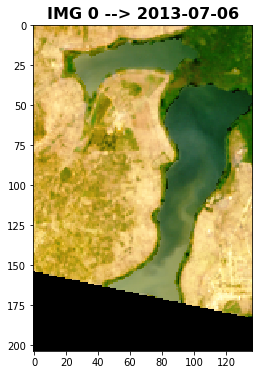

In [18]:
extent = (30.209661,-2.218817,30.246396,-2.163926)

x = (extent[0],extent[2])
y = (extent[1],extent[3])

print (x,y)
date_range = (
        datetime(2013,7,6),
        datetime(2013,7,7))
product = 'l8_rwanda'
ds = dc.load(product=product,x = x, y = y,
             output_crs = 'epsg:32636', resolution = (-30,30), 
             time = date_range, measurements = ('red', 'green', 'blue','nir') )
t=0
cnt=0
plot_labeled_rgb(ds, t, cnt, figsize=figsize)

In [19]:
date_range = (
        datetime(2013,7,6),
        datetime(2013,7,7))

dsets = dc.find_datasets(product=product,x = x, y = y,
             output_crs = 'epsg:32636', resolution = (-30,30), 
             time = date_range, measurements = ('red', 'green', 'blue','nir') )

myds = dsets[0]

type(myds)
fp = myds.measurements['red']['path']
return_path_row(fp)


172061 20130706


'172061'

In [20]:
print(myds.bounds)

BoundingBox(left=153900.0, bottom=-276300.0, right=381300.0, top=-44100.0)


In [21]:
date_range = (
        datetime(2013,4,10),
        datetime(2013,4,11))

dsets = dc.find_datasets(product=product,x = x, y = y,
             output_crs = 'epsg:32636', resolution = (-30,30), 
             time = date_range, measurements = ('red', 'green', 'blue','nir') )

myds = dsets[0]

type(myds)
fp = myds.measurements['red']['path']
return_path_row(fp)
print(myds.bounds)

172062 20130410
BoundingBox(left=187200.0, bottom=-429600.0, right=411600.0, top=-210900.0)


In [22]:
ulX = myds.bounds.left
ulY = myds.bounds.top

lrX = myds.bounds.right
lrY = myds.bounds.bottom

In [23]:
print(myds.crs)
ep = myds.crs
m = prj_base_map(ulX,ulY,lrX,lrY,resolution=None, epsg=ep)

epsg:32636


In [24]:
# m

In [25]:
prj_display_map(m,ulX,ulY,lrX,lrY, epsg=ep)

In [26]:
print (aoix, aoiy)

ul_lon = aoix[0]
ul_lat = aoiy[1]

lr_lon = aoix[1]
lr_lat = aoiy[0]

from prepare import *
ulx,uly = ge_translate(ul_lat,ul_lon,epsg=ep)

print(ulx,uly)

lrx,lry = ge_translate(lr_lat,lr_lon,epsg=ep)



(30.209661, 30.246396) (-2.218817, -2.163926)
-2.163926 30.209661
189601.87095402722 -239465.5448399979
189601.87095402722 -239465.5448399979
-2.218817 30.246396
193702.6361856839 -245532.30215066415


In [27]:
#m = prj_base_map(ulX,ulY,lrX,lrY,resolution=None, epsg=ep)
prj_display_map(m,ulx,uly,lrx,lry, color='pink', epsg=ep)

In [28]:
# copied from mtl - good ole MTL 
CORNER_UL_LAT_PRODUCT = -0.45826
CORNER_UL_LON_PRODUCT = 30.49432
CORNER_UR_LAT_PRODUCT = -0.45868
CORNER_UR_LON_PRODUCT = 32.51291
CORNER_LL_LAT_PRODUCT = -2.43770
CORNER_LL_LON_PRODUCT = 30.49214
CORNER_LR_LAT_PRODUCT = -2.43996
CORNER_LR_LON_PRODUCT = 32.51249
CORNER_UL_PROJECTION_X_PRODUCT = 221100.000
CORNER_UL_PROJECTION_Y_PRODUCT = -50700.000
CORNER_UR_PROJECTION_X_PRODUCT = 445800.000
CORNER_UR_PROJECTION_Y_PRODUCT = -50700.000
CORNER_LL_PROJECTION_X_PRODUCT = 221100.000
CORNER_LL_PROJECTION_Y_PRODUCT = -269700.000
CORNER_LR_PROJECTION_X_PRODUCT = 445800.000
CORNER_LR_PROJECTION_Y_PRODUCT = -269700.000


In [29]:
geo_display_map(m, CORNER_UL_LAT_PRODUCT, CORNER_UL_LON_PRODUCT,
               CORNER_UR_LAT_PRODUCT, CORNER_UR_LON_PRODUCT,
                CORNER_LR_LAT_PRODUCT, CORNER_LR_LON_PRODUCT,
               CORNER_LL_LAT_PRODUCT, CORNER_LL_LON_PRODUCT)
               

In [30]:
CORNER_UL_LAT_PRODUCT = -0.45826
CORNER_UL_LON_PRODUCT = 30.49432
CORNER_UR_LAT_PRODUCT = -0.45868
CORNER_UR_LON_PRODUCT = 32.51291
CORNER_LL_LAT_PRODUCT = -2.43770
CORNER_LL_LON_PRODUCT = 30.49214
CORNER_LR_LAT_PRODUCT = -2.43996
CORNER_LR_LON_PRODUCT = 32.51249
CORNER_UL_PROJECTION_X_PRODUCT = 221100.000
CORNER_UL_PROJECTION_Y_PRODUCT = -50700.000
CORNER_UR_PROJECTION_X_PRODUCT = 445800.000
CORNER_UR_PROJECTION_Y_PRODUCT = -50700.000
CORNER_LL_PROJECTION_X_PRODUCT = 221100.000
CORNER_LL_PROJECTION_Y_PRODUCT = -269700.000
CORNER_LR_PROJECTION_X_PRODUCT = 445800.000
CORNER_LR_PROJECTION_Y_PRODUCT = -269700.000


In [31]:
geo_display_map(m, CORNER_UL_LAT_PRODUCT, CORNER_UL_LON_PRODUCT,
               CORNER_UR_LAT_PRODUCT, CORNER_UR_LON_PRODUCT,
                CORNER_LR_LAT_PRODUCT, CORNER_LR_LON_PRODUCT,
               CORNER_LL_LAT_PRODUCT, CORNER_LL_LON_PRODUCT)

In [32]:

    
CORNER_UL_LAT_PRODUCT = -1.90576
CORNER_UL_LON_PRODUCT = 30.18853
CORNER_UR_LAT_PRODUCT = -1.90789
CORNER_UR_LON_PRODUCT = 32.20516
CORNER_LL_LAT_PRODUCT = -3.88195
CORNER_LL_LON_PRODUCT = 30.18366
CORNER_LR_LAT_PRODUCT = -3.88629
CORNER_LR_LON_PRODUCT = 32.20378
CORNER_UL_PROJECTION_X_PRODUCT = 187200.000
CORNER_UL_PROJECTION_Y_PRODUCT = -210900.000
CORNER_UR_PROJECTION_X_PRODUCT = 411600.000
CORNER_UR_PROJECTION_Y_PRODUCT = -210900.000
CORNER_LL_PROJECTION_X_PRODUCT = 187200.000
CORNER_LL_PROJECTION_Y_PRODUCT = -429600.000
CORNER_LR_PROJECTION_X_PRODUCT = 411600.000
CORNER_LR_PROJECTION_Y_PRODUCT = -429600.000


In [33]:
geo_display_map(m, CORNER_UL_LAT_PRODUCT, CORNER_UL_LON_PRODUCT,
               CORNER_UR_LAT_PRODUCT, CORNER_UR_LON_PRODUCT,
                CORNER_LR_LAT_PRODUCT, CORNER_LR_LON_PRODUCT,
               CORNER_LL_LAT_PRODUCT, CORNER_LL_LON_PRODUCT)

In [34]:
# from the level 1 MTL
CORNER_UL_LAT_PRODUCT = -0.45826
CORNER_UL_LON_PRODUCT = 30.49432
CORNER_UR_LAT_PRODUCT = -0.45868
CORNER_UR_LON_PRODUCT = 32.51291
CORNER_LL_LAT_PRODUCT = -2.43770
CORNER_LL_LON_PRODUCT = 30.49214
CORNER_LR_LAT_PRODUCT = -2.43996
CORNER_LR_LON_PRODUCT = 32.51249
CORNER_UL_PROJECTION_X_PRODUCT = 221100.000
CORNER_UL_PROJECTION_Y_PRODUCT = -50700.000
CORNER_UR_PROJECTION_X_PRODUCT = 445800.000
CORNER_UR_PROJECTION_Y_PRODUCT = -50700.000
CORNER_LL_PROJECTION_X_PRODUCT = 221100.000
CORNER_LL_PROJECTION_Y_PRODUCT = -269700.000
CORNER_LR_PROJECTION_X_PRODUCT = 445800.000
CORNER_LR_PROJECTION_Y_PRODUCT = -269700.000


In [35]:
geo_display_map(m, CORNER_UL_LAT_PRODUCT, CORNER_UL_LON_PRODUCT,
               CORNER_UR_LAT_PRODUCT, CORNER_UR_LON_PRODUCT,
                CORNER_LR_LAT_PRODUCT, CORNER_LR_LON_PRODUCT,
               CORNER_LL_LAT_PRODUCT, CORNER_LL_LON_PRODUCT)

In [36]:
ee="""\
UL Corner Lat dec: -.4611
UL Corner Long dec: 30.84096
UR Corner Lat dec: -.81996
UR Corner Long dec: 32.51028
LL Corner Lat dec: -2.07657
LL Corner Long dec: 30.49601
LR Corner Lat dec: -2.43881
LR Corner Long dec: 32.16677
"""

print(ee)

a=[]
ee_dict={}
for mline in ee.splitlines():
    # print(mline, "\n")
    a = list(mline.split(':'))
    #print(a)
    # print(a[1])
    ee_dict[a[0]] = float(a[1])
    print("ee_dict[\'{}\'],".format(a[0]))
   

UL Corner Lat dec: -.4611
UL Corner Long dec: 30.84096
UR Corner Lat dec: -.81996
UR Corner Long dec: 32.51028
LL Corner Lat dec: -2.07657
LL Corner Long dec: 30.49601
LR Corner Lat dec: -2.43881
LR Corner Long dec: 32.16677

ee_dict['UL Corner Lat dec'],
ee_dict['UL Corner Long dec'],
ee_dict['UR Corner Lat dec'],
ee_dict['UR Corner Long dec'],
ee_dict['LL Corner Lat dec'],
ee_dict['LL Corner Long dec'],
ee_dict['LR Corner Lat dec'],
ee_dict['LR Corner Long dec'],


In [37]:
geo_display_map(m, 
                ee_dict['UL Corner Lat dec'],
                ee_dict['UL Corner Long dec'],
                ee_dict['UR Corner Lat dec'],
                ee_dict['UR Corner Long dec'],
                ee_dict['LR Corner Lat dec'],
                ee_dict['LR Corner Long dec'],
                ee_dict['LL Corner Lat dec'],
                ee_dict['LL Corner Long dec'],
                color='blue')

In [38]:
myds.measurements['red']['path']

'/mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1_sr_band4.tif'

In [39]:
!gdalinfo '/mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1_sr_band4.tif'

Driver: GTiff/GeoTIFF
Files: /mnt/rwanda/LC08/172/062/2013/LC081720622013041001T1-SC20181129211422/LC08_L1TP_172062_20130410_20170505_01_T1_sr_band4.tif
Size is 7481, 7291
Coordinate System is:
PROJCS["WGS 84 / UTM zone 36N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",33],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32636"]]
Origin = (187185.000000000000000,-21088

In [40]:
CORNER_UL_PROJECTION_X_PRODUCT = 221100.000
CORNER_UL_PROJECTION_Y_PRODUCT = -50700.000
CORNER_UR_PROJECTION_X_PRODUCT = 445800.000
CORNER_UR_PROJECTION_Y_PRODUCT = -50700.000
CORNER_LL_PROJECTION_X_PRODUCT = 221100.000
CORNER_LL_PROJECTION_Y_PRODUCT = -269700.000
CORNER_LR_PROJECTION_X_PRODUCT = 445800.000
CORNER_LR_PROJECTION_Y_PRODUCT = -269700.000

In [41]:
(gulx,guly) = ge_untranslate(CORNER_UL_PROJECTION_X_PRODUCT, CORNER_UL_PROJECTION_Y_PRODUCT, epsg=ep )

221100.0 -50700.0
-0.45825720287716865 30.494320840907196


In [42]:
(gulx,guly) = ge_untranslate(  187185.000, -210885.000, epsg=ep )

187185.0 -210885.0
-1.9056251811114577 30.188399591272542
